In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('/content/election2024.csv')
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [5]:
df.tail()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849
1599,07168088318cef88,female,76.0,ural,village,named correct date,definitely yes,Putin,over 4 hours a day,over 4 hours a day,school,hard to say,unemployed pensioner,NaN,NaN,0.860836


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [7]:
df.shape

(1600, 16)

In [8]:
df = df.drop('id', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  job_type             692 non-null    object 
 13  company_type         879 non-null    object 
 14  weight1              1600 non-null   float64
dtypes: float64(2), object(13)
memory usage

In [11]:
df.shape

(1600, 15)

In [14]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

In [17]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

In [18]:
cat_cols

['sex',
 'federal_district',
 'type_of_city',
 'knows_election_date',
 'will_vote',
 'candidate',
 'television_usage',
 'internet_usage',
 'education',
 'income',
 'employment',
 'job_type',
 'company_type']

In [19]:
num_cols

['age', 'weight1']

In [20]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

sex has ['male' 'female'] values 

federal_district has ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern'] values 

type_of_city has ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k'] values 

knows_election_date has ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year'] values 

will_vote has ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer'] values 

candidate has ['Putin' 'Davankov' 'will not take part' 'spoilt vote' 'Kharitonov'
 'struggle to answer' 'Slutskiy'] values 

television_usage has ['several times a week' 'once half a year' 'does not watch'
 'less than 4 hours a day' 'over 4 hours a day' 'several times a month'] values 

internet_usage has ['over 4 hours a day' 'less than 4 hours a day' 'seve

In [21]:
for col in num_cols:
    print(f"{col} has {df[col].unique()} values \n")

age has [18. 23. 20. 22. 21. 27. 37. 43. 39. 36. 49. 60. 44. 61. 67. 29. 47. 32.
 45. 35. 53. 71. 54. 55. 48. 66. 56. 68. 69. 33. 76. 77. 70. 86. 90. 75.
 80. 24. 19. 25. 28. 31. 26. 30. 38. 40. 41. 52. 50. 51. 46. 63. 34. 42.
 65. 73. 74. 72. 59. 57. 58. 78. 79. 62. 64. 82. 84. 85. 87. 83. 81.] values 

weight1 has [1.4451723  1.30169057 1.53862846 1.96701511 1.12755798 0.57938435
 0.66225868 0.46822644 1.11125835 1.0171491  0.68052271 1.36383975
 0.9335162  1.00725569 0.7708055  0.66629916 1.14387157 1.43547598
 1.39409861 1.07513514 1.11710943 0.7806746  1.53497202 0.84696474
 1.43623126 0.94180636 0.88250276 1.08890077 0.91291972 0.96414561
 1.09857179 0.89380199 0.988372   2.043194   0.86591293 1.03229797
 0.72917981 1.07592977 1.00488653 1.01808016 0.77306254 0.93654493
 1.42690278 1.21272352 1.35754264 1.49031826 1.52626403 1.40007899
 1.2463015  1.18572018 1.21074151 0.91218133 1.30125028 0.85601171
 0.97845444 1.05195444 1.07732708 0.92277989 0.95160676 1.24995087
 2.03160284 

In [22]:
df.isna()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1596,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1597,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isna().sum()

,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0
education,0


In [24]:
# insights >> job_type, company_type is having null values

In [25]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


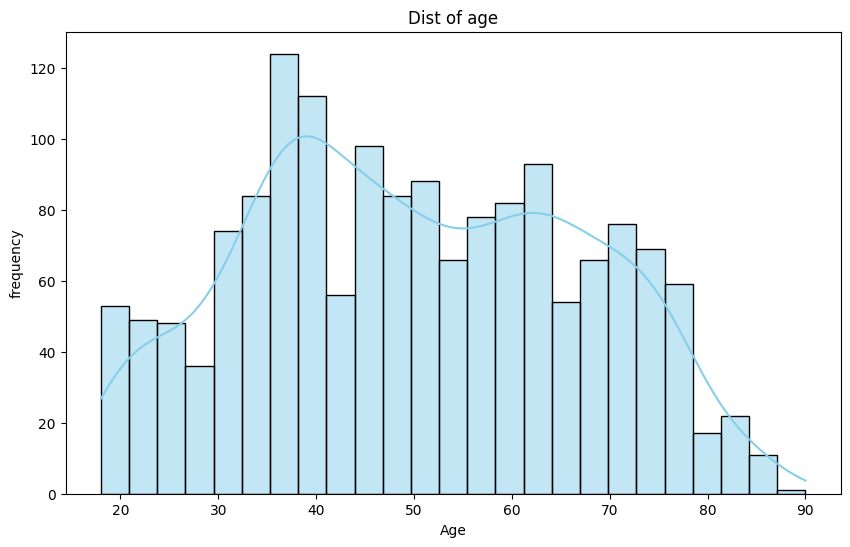

In [27]:
#Univariate

plt.figure(figsize = (10, 6))
sns.histplot(df['age'].dropna(), kde = True, bins = 25, color = 'skyblue')
plt.title('Dist of age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

<Axes: xlabel='age', ylabel='count'>

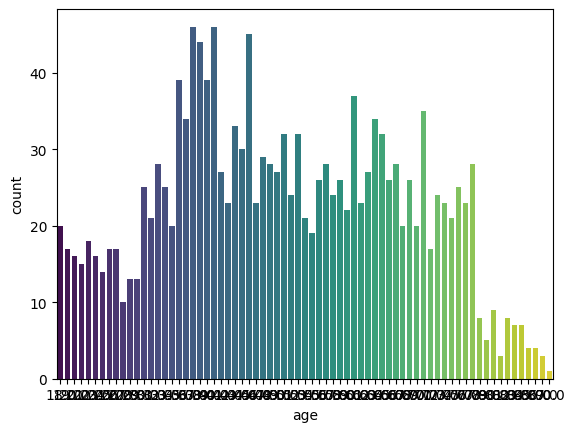

In [28]:
sns.countplot(x = 'age', data = df, palette = 'viridis')

In [29]:
df.age.mean()

49.93625

In [38]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

<Axes: xlabel='federal_district', ylabel='Count'>

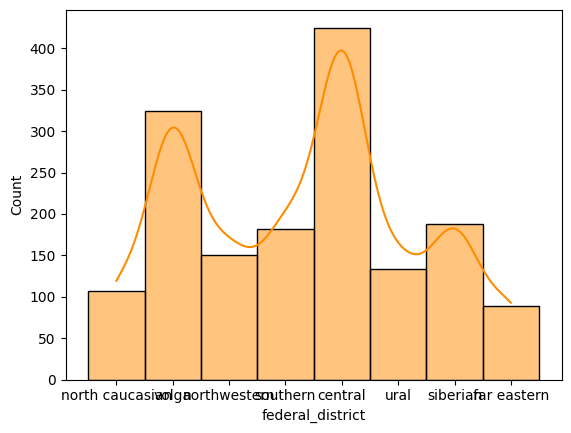

In [44]:
sns.histplot(df['federal_district'], bins = 20, kde = True, color = 'darkorange')

<BarContainer object of 1600 artists>

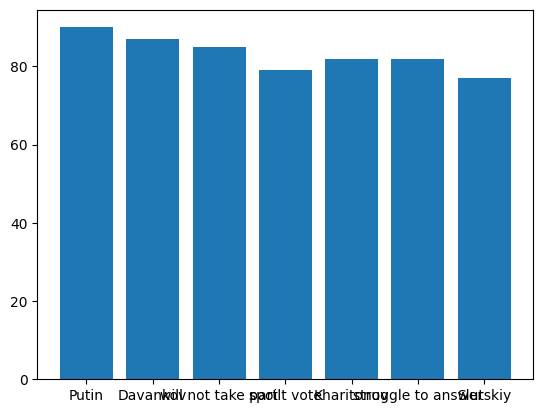

In [48]:
plt.bar(df['candidate'], df['age'])

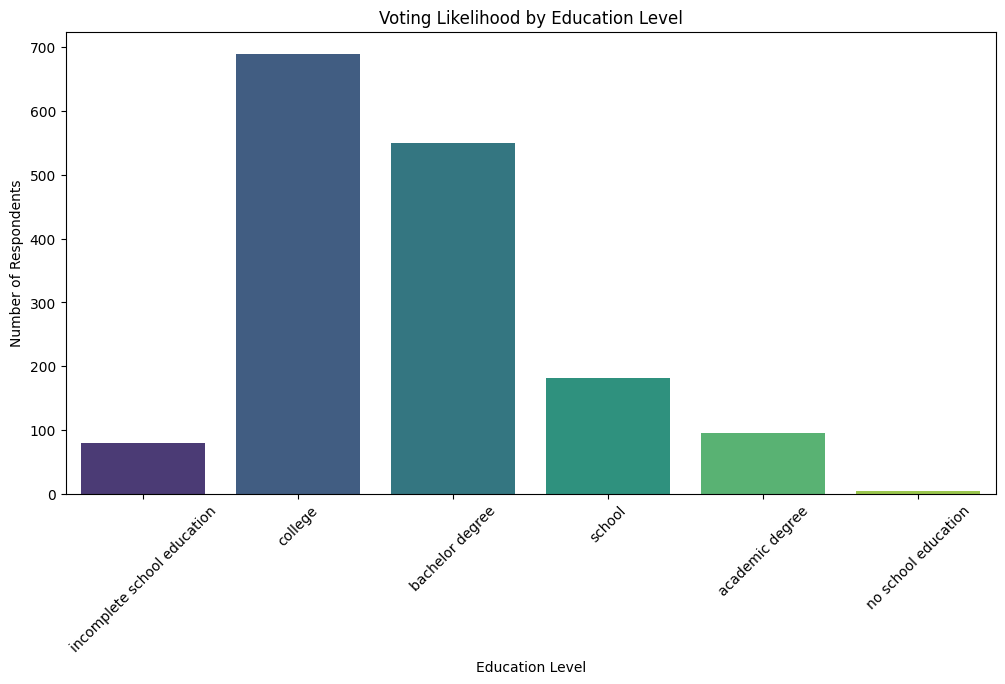

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education',  data = df, palette = 'viridis')
plt.title('Voting Likelihood by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

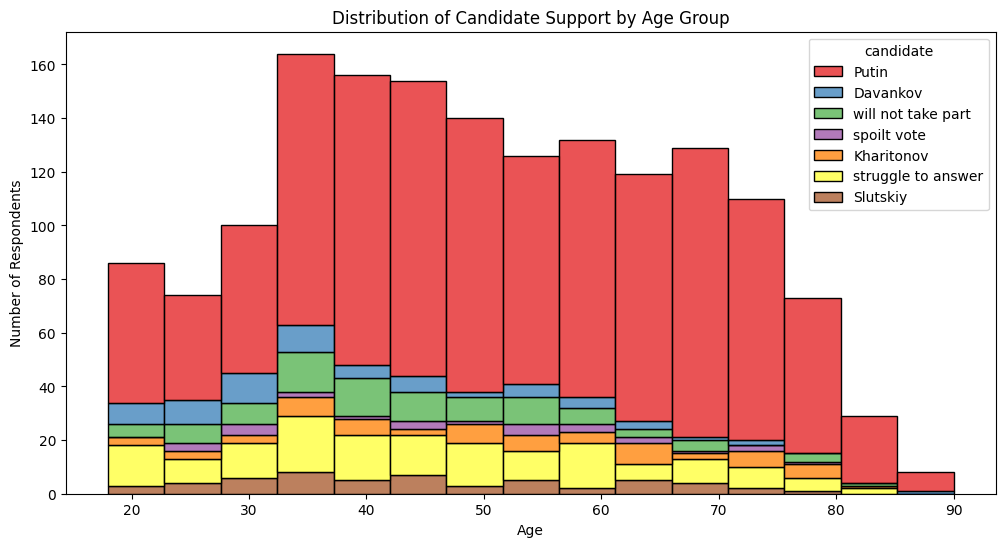

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='candidate', multiple='stack', palette='Set1', bins=15)
plt.title('Distribution of Candidate Support by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()


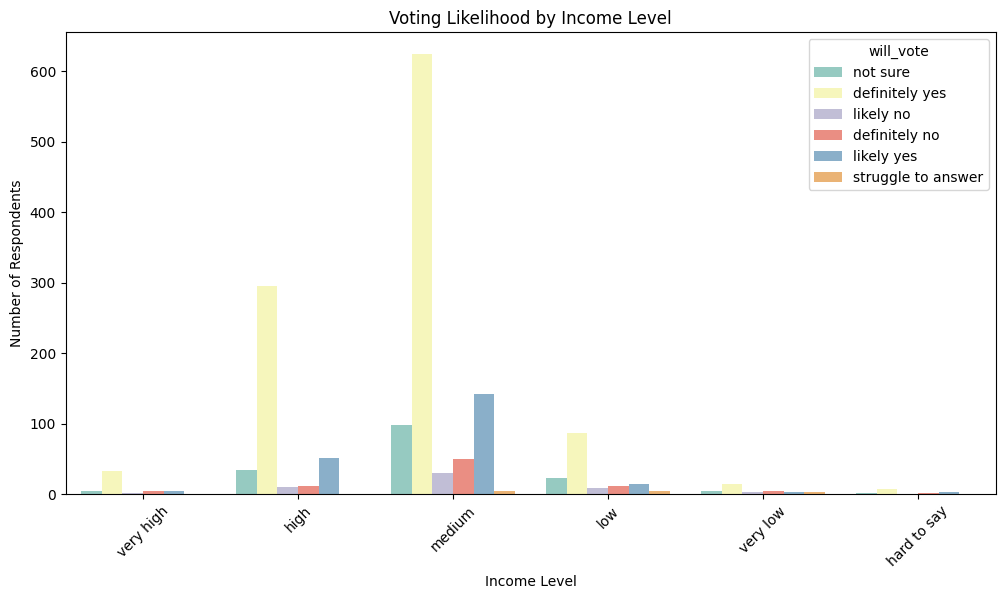

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='income', hue='will_vote', palette='Set3')
plt.title('Voting Likelihood by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


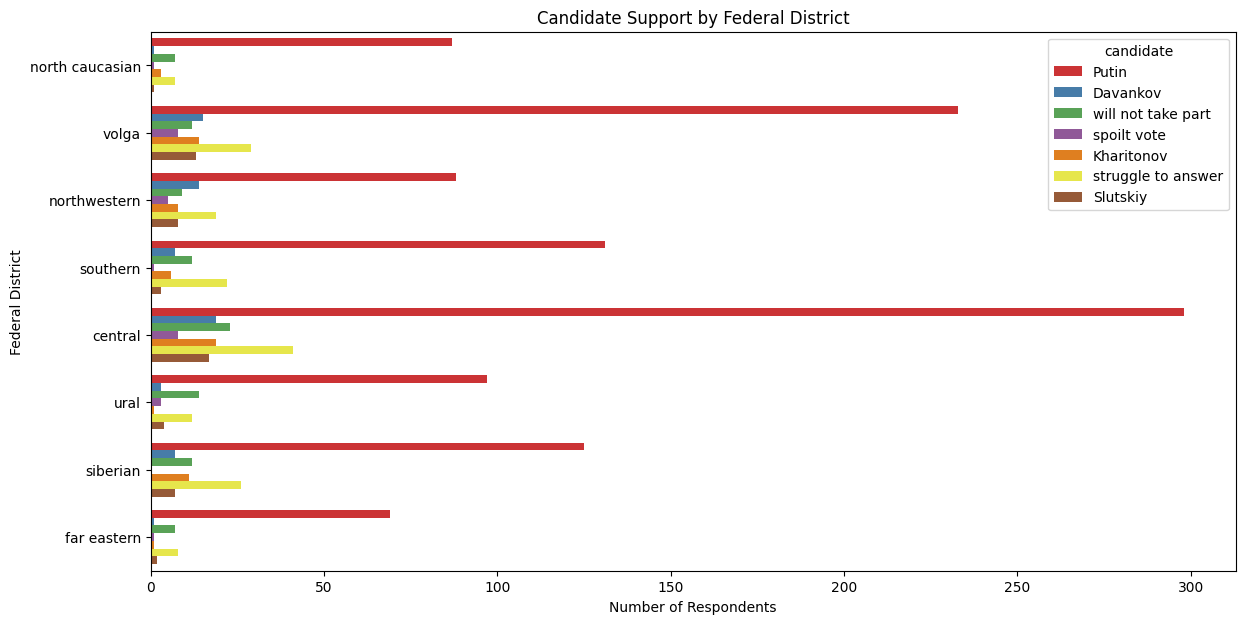

In [55]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='federal_district', hue='candidate', palette='Set1')
plt.title('Candidate Support by Federal District')
plt.xlabel('Number of Respondents')
plt.ylabel('Federal District')
plt.show()

<Axes: ylabel='count'>

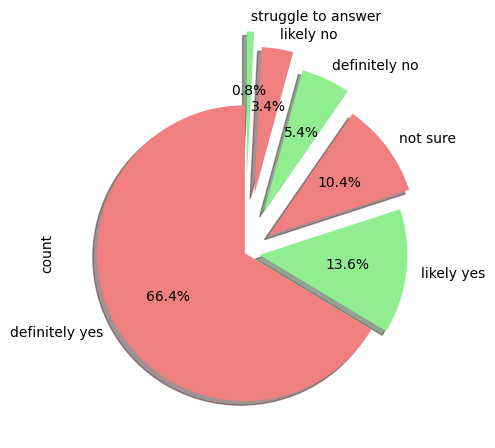

In [60]:
df.will_vote.value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode = (0, 0.1, 0.2,0.3,0.4,0.5), startangle = 90, shadow = True)

In [12]:
df.corr(numeric_only=True)

,age,weight1
age,1.000000,-0.319715
weight1,-0.319715,1.000000


<Axes: >

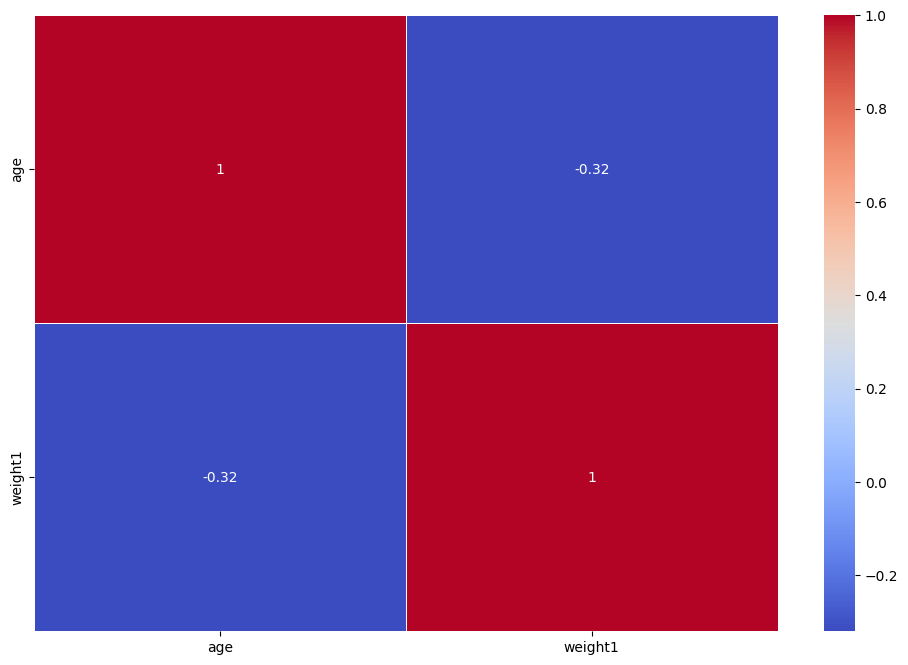

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = .5)

In [14]:
# handling Non value

In [15]:
df.isna().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [17]:
df.job_type.unique()

array([nan, 'commercial organization', 'law enforcement agency',
       'government agency', 'government, management, judicial bodies',
       'non-profit agency', 'hard to say'], dtype=object)

In [20]:
df.isna().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [22]:
df.job_type.fillna(df.job_type.mode()[0], inplace = True)

In [24]:
df.isna().sum()


,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [25]:
df.company_type.fillna(df.company_type.mode()[0], inplace = True)

In [26]:
df.isna().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [27]:
df.company_type.unique()

array(['farming', 'trade', 'law enforcement agency',
       'industry, manufacturing', 'tech, programming, communications',
       'refused to answer', 'other', 'housing and communal services',
       'finances', 'education', 'healthcare', 'state administration',
       'culture, sports', 'transportation, storage',
       'Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...',
       'catering, restaurants', 'construction, architecture',
       'hard to say', 'entertainment, tourism', 'social services',
       'media'], dtype=object)